In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import PIL
import numpy as np
import torch
import torchvision

In [ ]:
# ROOT_PATH 확인 
if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/Colab Notebooks"
else :
  ROOT_PATH = os.path.abspath('..')

# 비디오 영상 경로
VIDEO_PATH = ROOT_PATH + "/data"
# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"

In [ ]:
IMAGE_PATH

'/content/drive/MyDrive/Colab Notebooks/image'

In [ ]:
vidcap = cv2.VideoCapture(VIDEO_PATH + '/FS0113861_002600.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(IMAGE_PATH + "/%06d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

print("finish! convert video to frame")

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
IMAGE_PATH

'/content/drive/MyDrive/Colab Notebooks/image'

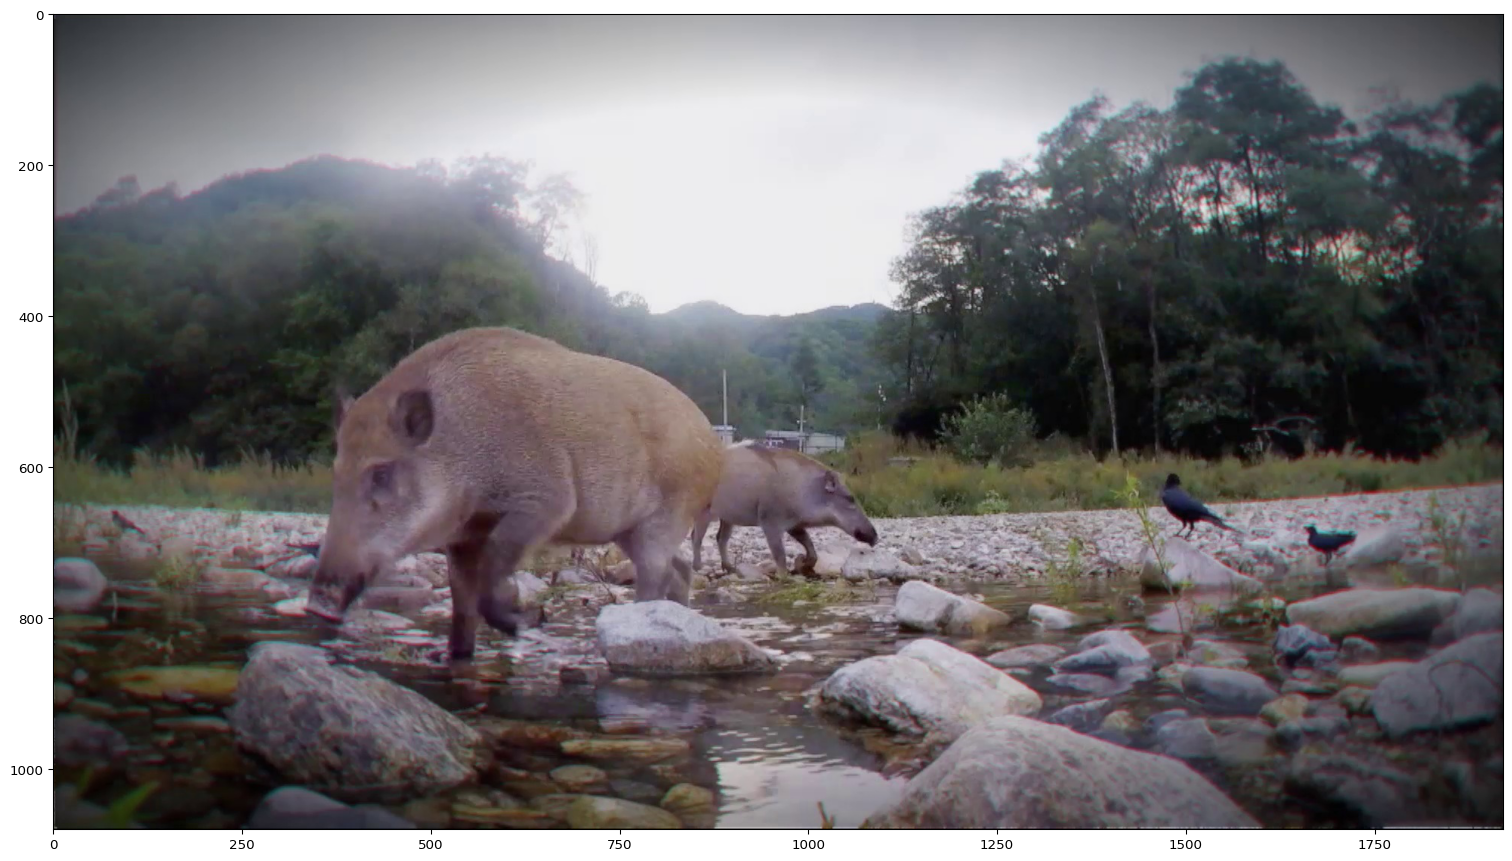

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline

image = imageio.imread(IMAGE_PATH+"/000083.jpg") 
ia.imshow(image)

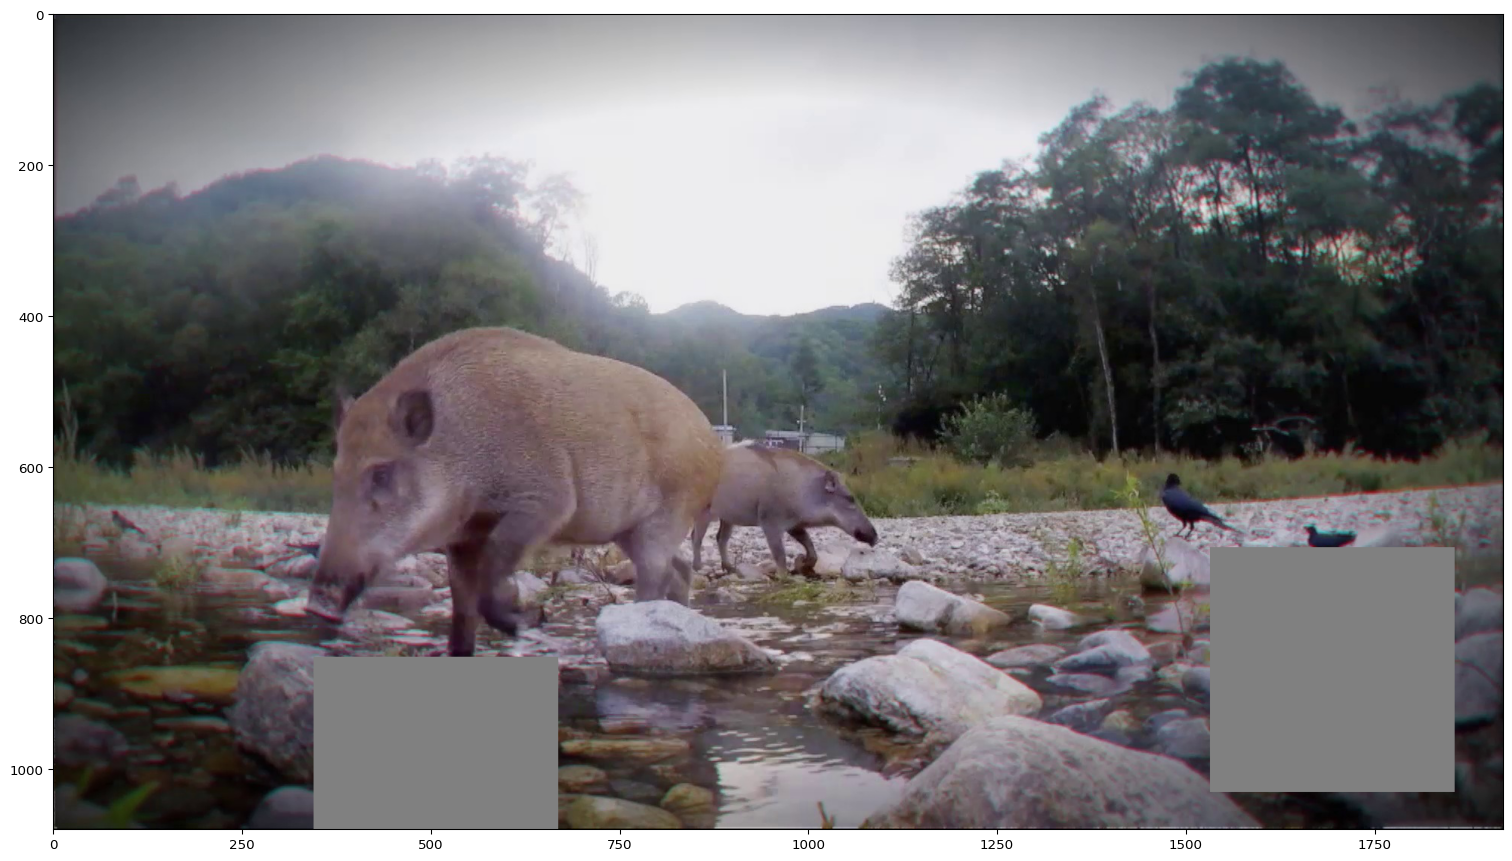

In [ ]:
aug = iaa.Cutout(nb_iterations=2, size = 0.3) # 개수 2개, 사이즈 0.3
image_aug = aug(image = image) # 인자 이름을 image로 설정(단일 이미지 적용)

ia.imshow(image_aug)

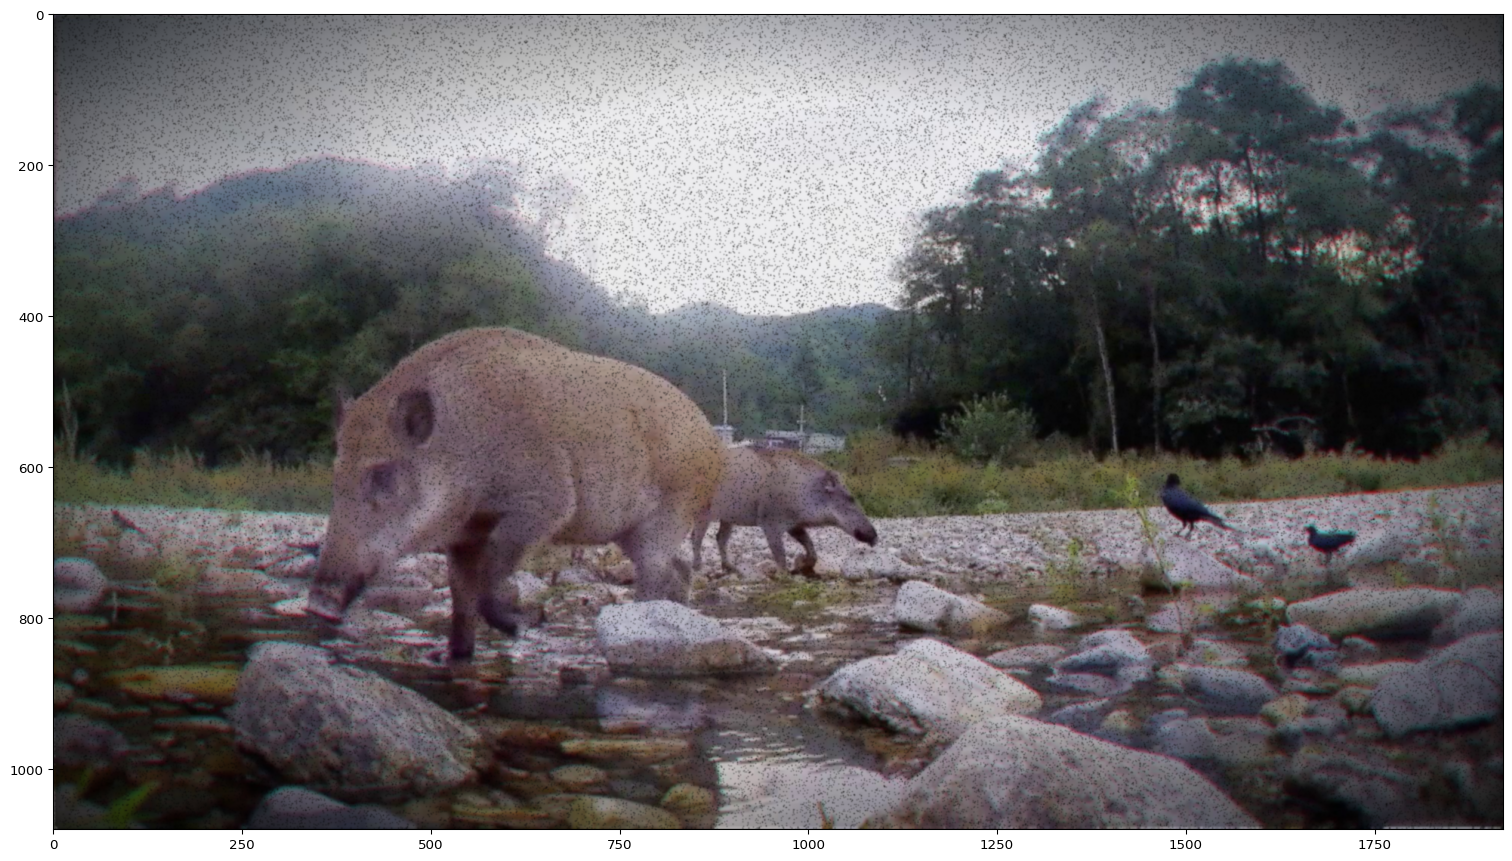

In [ ]:
def my_aug(image):
    aug1 = iaa.Dropout(p=0.05) # 첫 번째 증강 기법 : Dropout
    aug2 = iaa.GaussianBlur(sigma=0.8) # 두 번째 증강 기법 : GaussianBlur
    first_aug = aug1(image = image) # Dropout 적용
    return aug2(image = first_aug) # GaussianBlur 적용 후 결과 반환

image_aug = my_aug(image = image) # 인자 이름을 image로 설정(단일 이미지 적용)

ia.imshow(image_aug)